### 1. Definição do problema
- Prever se uma determinada pessoa ganha mais ou menos do que 50 mil dólares por ano (4.2mil USD/mês)
- Quais colunas tem maior influência no salário.

### 2. Importação dos dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url_data = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
# Fonte: https://towardsdatascience.com/logistic-regression-classifier-on-census-income-data-e1dbef0b5738
columns = ["age", "workClass", "fnlwgt", "education", "education-num",
           "marital-status", "occupation", "relationship",
          "race", "sex", "capital-gain", "capital-loss", "hours-per-week", 
           "native-country", "income"]

In [3]:
#  ignorando os espaços que existem na separação de cada coluna (sep=' *, *')
 
data = pd.read_csv(url_data, names=columns, na_values='?', sep=' *, *') # Expressão regular
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workClass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### 3. EDA

In [5]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


 - Verificando a distribuição da variável de saída.

In [6]:
data['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [7]:
data['income'].value_counts(normalize=True)

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

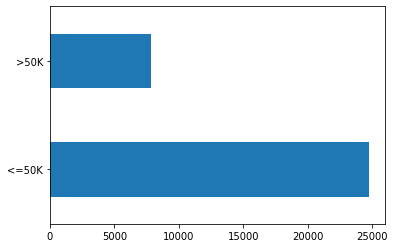

In [8]:
data['income'].value_counts().plot.barh()

 - Visualizando a distribuição dos dados em função da variável "income".

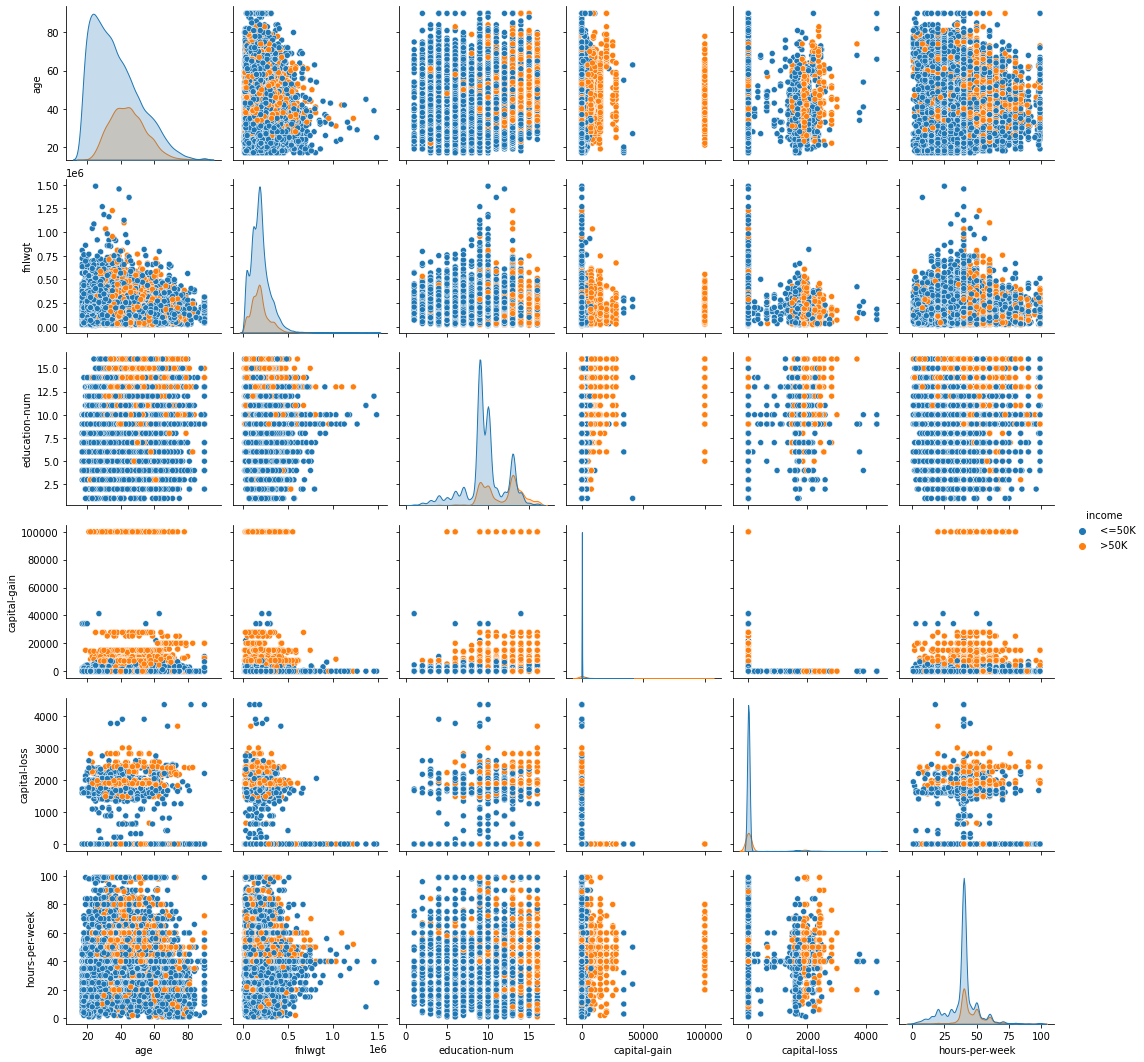

In [9]:
sns.pairplot(data, hue='income')

In [10]:
#sns.pairplot(data.sample(1000))
#Alternativa

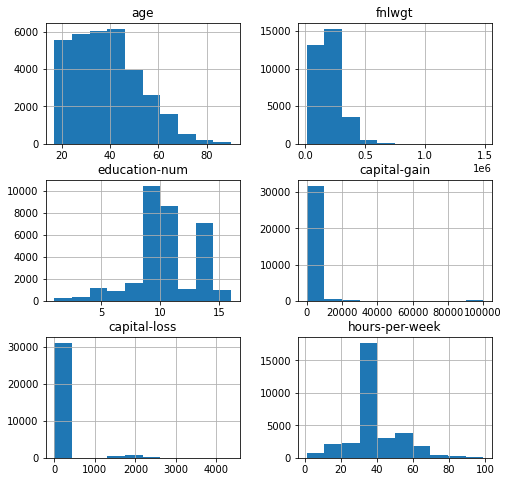

In [11]:
data.hist(figsize=(8,8));

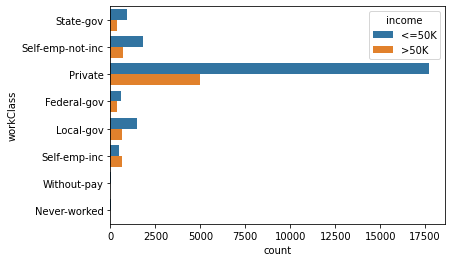

In [12]:
sns.countplot(y='workClass', hue='income', data = data)

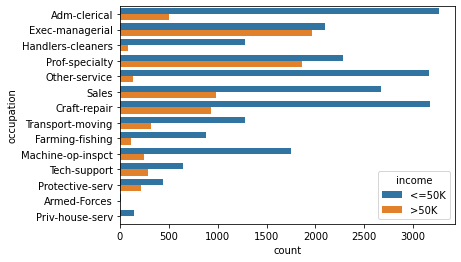

In [13]:
sns.countplot(y='occupation', hue='income', data = data)

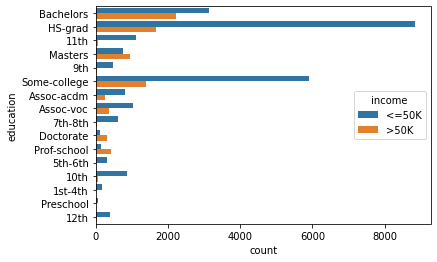

In [14]:
sns.countplot(y='education', hue='income', data = data)

In [15]:
data.head()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 4. Modelagem 

#### 4.1 Preparação dos Dados
- Separação Treino/Teste
- Separar Dados de Entrada (Atributos) e de saída (target)
- Tratar colunas categóricas
- Tratar dados ausentes
- Escalar os dados


 - Separando dados de Entrada (Atributos) e de saída (target)

In [16]:
X = data.drop('income', axis=1)
y = data.income

In [17]:
X.head()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [18]:
y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

- Tratando colunas categóricas

In [19]:
y.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [20]:
#def substituir(x):
#  return 1 if x=='>50K' else 0

#y.apply(lambda x: 1 if x=='>50K' else 0)


y=y.replace({'>50K': 1, '<=50K':0})

- Tratando colunas categoricas da entrada (e categorias ausentes)

In [21]:
X = pd.get_dummies(X) # drop_first=True pode ser considerado

-  Separação Treino/Teste

In [22]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    test_size=0.2,
                                                    stratify=y)

In [23]:
data.select_dtypes(int).columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

- Tratar dados numericos ausentes

In [24]:
num_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week']
train_median = X_train[num_cols].median()
X_train[num_cols]=X_train[num_cols].fillna(train_median)
X_test[num_cols]=X_test[num_cols].fillna(train_median)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [25]:
X_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workClass_Federal-gov,workClass_Local-gov,workClass_Never-worked,workClass_Private,workClass_Self-emp-inc,workClass_Self-emp-not-inc,workClass_State-gov,workClass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,...,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
15738,32,37210,13,0,0,45,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
27985,43,101950,14,0,0,45,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30673,20,122244,9,0,0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9505,40,24763,10,6849,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
26417,24,113936,13,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [26]:
# TODO: Aplicar standard scaller nos valores numericos
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

#### 4.2 Benchmark

In [27]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

y_pred = dummy_clf.predict(X_test)

-  Acuracia

In [28]:
np.mean(y_pred==y_test)

0.7592507293106096

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7592507293106096

- Matriz de confusão

Text(33.0, 0.5, 'Real ( 1 ou 0)')

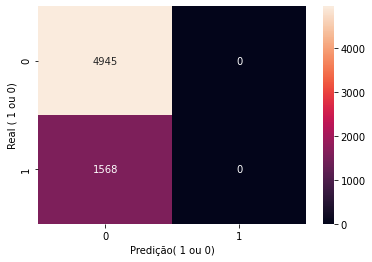

In [30]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4945
           1       0.00      0.00      0.00      1568

    accuracy                           0.76      6513
   macro avg       0.38      0.50      0.43      6513
weighted avg       0.58      0.76      0.66      6513



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn.metrics import roc_auc_score

In [33]:
y_proba = dummy_clf.predict_proba(X_test)
roc_auc_score(y_test, y_proba[:, 1])

0.5

#### 4.3 Triagem de Modelos
- Random Forest
- XGBoost
- Arvore de Decisão
- Regressão Logística


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [36]:
lista_classificacores = [LogisticRegression(),
                         DecisionTreeClassifier(),
                         RandomForestClassifier(),
                         XGBClassifier()]

for clf in lista_classificacores:
  print(clf.__class__.__name__)
  clf.fit(X_train, y_train)

  print('Acuracia')
  train_acc=clf.score(X_train, y_train)
  test_acc=clf.score(X_test, y_test)
  print('Treino:', train_acc)
  print('Teste:', test_acc)

  print('ROC AUC')
  y_proba_train = clf.predict_proba(X_train)
  roc_train=roc_auc_score(y_train, y_proba_train[:, 1])
  print('Treino', roc_train)

  y_proba_test = clf.predict_proba(X_test)
  roc_test = roc_auc_score(y_test, y_proba_test[:, 1])
  print('Test', roc_test)
  print('='*80)


LogisticRegression
Acuracia
Treino: 0.7973740786240786
Teste: 0.7994779671426377
ROC AUC
Treino 0.5813503339316877
Test 0.578881342729205
DecisionTreeClassifier
Acuracia
Treino: 0.9999616093366094
Teste: 0.8148318747121143
ROC AUC
Treino 0.9999999959693209
Test 0.7545857106745631
RandomForestClassifier
Acuracia
Treino: 0.9999616093366094
Teste: 0.8588975894365116
ROC AUC
Treino 0.9999997541285742
Test 0.9077544958832875
XGBClassifier
Acuracia
Treino: 0.8669763513513513
Teste: 0.8665745432212498
ROC AUC
Treino 0.9242939912852688
Test 0.9228740636800726


In [37]:
clf=XGBClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

Text(33.0, 0.5, 'Real ( 1 ou 0)')

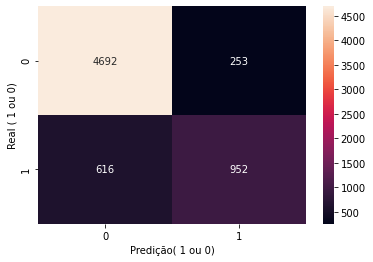

In [38]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [39]:
y_proba = clf.predict_proba(X_test)
roc_auc_score(y_test, y_proba[:, 1])

0.9228740636800726

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      4945
           1       0.79      0.61      0.69      1568

    accuracy                           0.87      6513
   macro avg       0.84      0.78      0.80      6513
weighted avg       0.86      0.87      0.86      6513



- Visualizando a ROC curve

In [46]:
from sklearn.metrics import  roc_auc_score, roc_curve
from sklearn import metrics

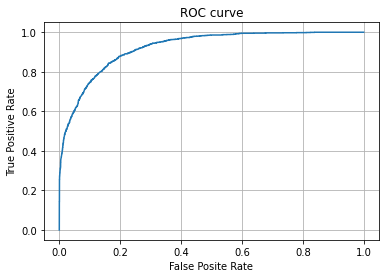

In [49]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba[:,1])
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Posite Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

### Quais colunas tem maior influência no salário.

In [50]:
df=pd.DataFrame(zip(X_train.columns, clf.feature_importances_), 
             columns=['Atributo', 'Importancia'])
df.sort_values('Importancia', ascending=False).head(10)

,Atributo,Importancia
32,marital-status_Married-civ-spouse,0.346171
2,education-num,0.092285
3,capital-gain,0.075989
40,occupation_Exec-managerial,0.061650
0,age,0.040912
46,occupation_Prof-specialty,0.034304
44,occupation_Other-service,0.029211
54,relationship_Own-child,0.029211
4,capital-loss,0.026548
5,hours-per-week,0.026295


-  Visualizaando Árvore de Decisão com baixa profundidade

ROC AUC de Teste é DecisionTreeClassifier é 83.50%


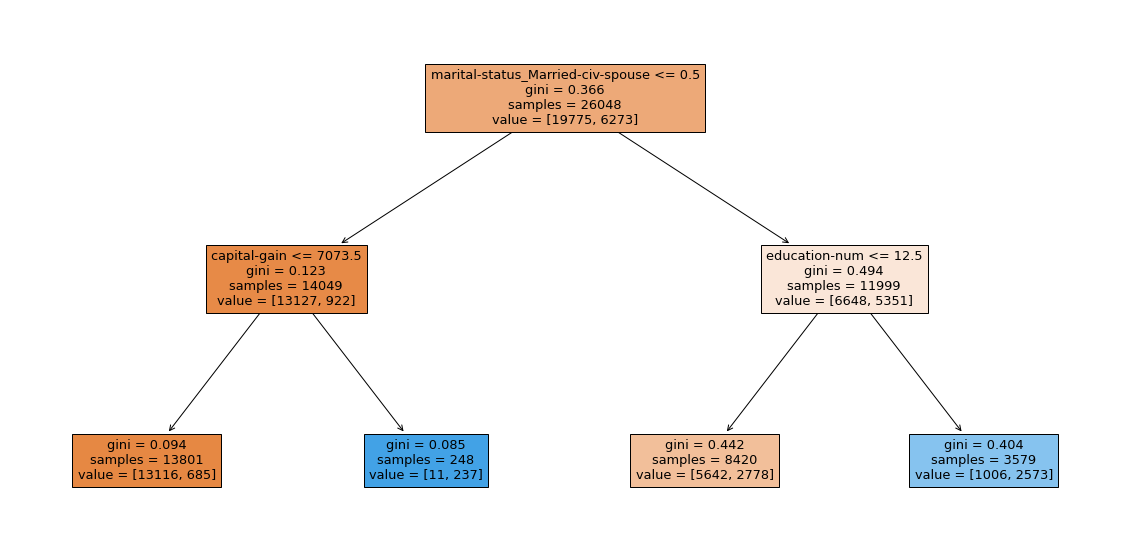

In [51]:
from sklearn.tree import plot_tree
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train) 
y_proba = clf.predict_proba(X_test)
roc_auc=roc_auc_score(y_test, y_proba[:, 1])

print(f'ROC AUC de Teste é {clf.__class__.__name__} é {roc_auc*100:.2f}%')

plt.figure(figsize=(20,10))
annotations = plot_tree(clf,
                        feature_names=X_train.columns,
                        filled=True)